Structure Factor
=============

In [1]:
import sys
sys.path.insert(1, '../wlcstat/')

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine
import wlcstat.active_brown as active_brown
import wlcstat.util.wlc_vertex as vertex
import importlib

In [3]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)
importlib.reload(active_brown)
importlib.reload(vertex)

<module 'wlcstat.util.wlc_vertex' from '../wlcstat/wlcstat/util/wlc_vertex.py'>

Evaluate the residues over a range of k values

In [7]:
num_k = 100
k_val_0 = 1e-4
k_val_f = 1e4
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=0
dimensions = 3
num_poles = 25

num_poles = min(num_poles, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))
residues = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,False,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]
        residues[i_k_val, i_pole] = resi_k_val[0, 0, i_pole]

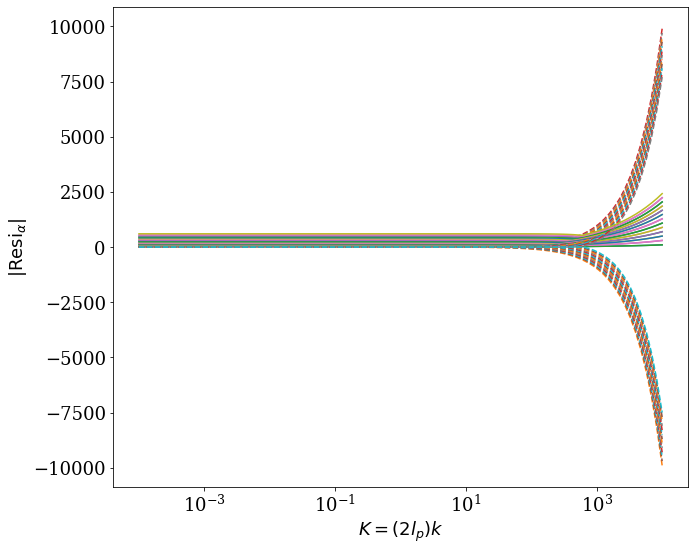

In [11]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.plot(k_val, -np.real(poles[:, i_pole]), '-')
    plt.plot(k_val, -np.imag(poles[:, i_pole]), '--')

plt.xscale('log')    
plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'$| \mathrm{Resi}_{\alpha} |$')
plt.tight_layout()
plt.show()

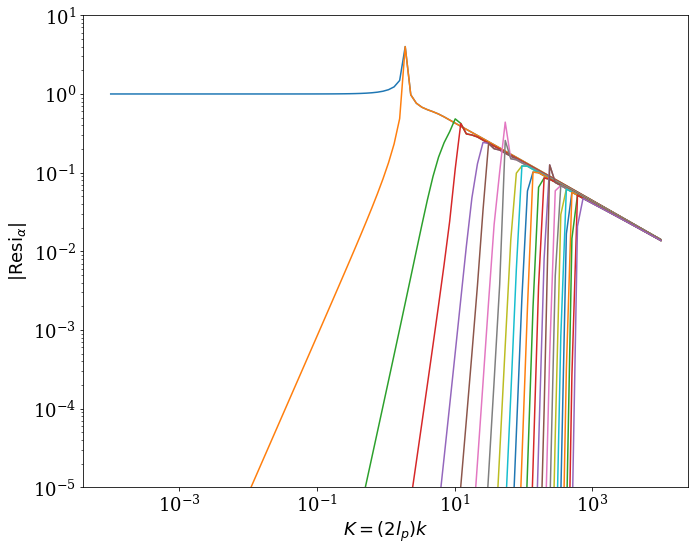

In [12]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.loglog(k_val, np.real(abs(residues[:, i_pole])))

plt.ylim([1e-5, 10])    
    
plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'$| \mathrm{Resi}_{\alpha} |$')
plt.tight_layout()
plt.show()

Evaluation of the double pole at p=0

In [15]:
num_k = 100
k_val_0 = 1e-3
k_val_f = 1e4
k_val_vec = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

alpha_max = 25
residue_zero = np.zeros((num_k, alpha_max + 1), dtype=type(1+1j))
ddp_residue_zero = np.zeros((num_k, alpha_max + 1), dtype=type(1+1j))
mu = 0


for i_k in range(num_k):
    k_val=k_val_vec[i_k]
    residue_zero_full, ddp_residue_zero_full = vertex.eval_residue_zero(
        k_val, mu, lam_zero_only=False, lam_max=25, dimensions=3, lam_cont_frac_max=500)
    residue_zero[i_k,:], ddp_residue_zero[i_k,:] = residue_zero_full[0,:], ddp_residue_zero_full[0,:]


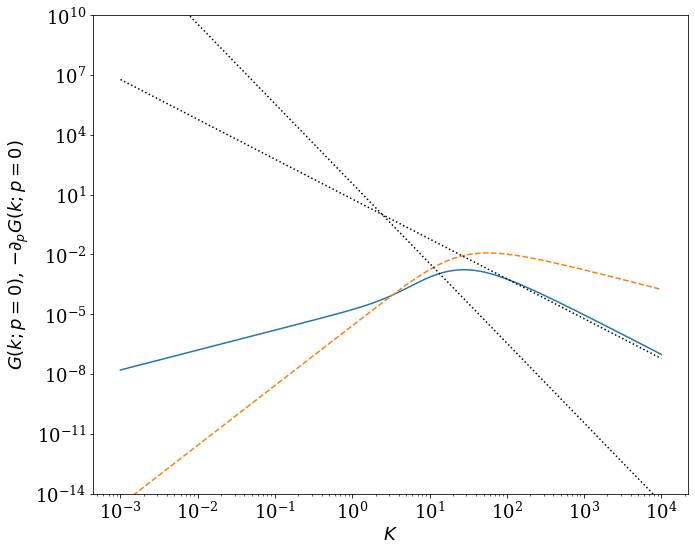

In [21]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(k_val_vec, np.abs(ddp_residue_zero)[:,5],'-')
plt.plot(k_val_vec, np.abs(residue_zero)[:,5],'--')

a1 = np.sqrt(1 / 3)
plt.plot(k_val_vec, 2 / a1 ** 2 * k_val_vec ** -2,'k:')
plt.plot(k_val_vec, 4 / a1 ** 4 * k_val_vec ** -4,'k:')

 
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'$G(k;p=0)$, $-\partial_{p} G(k;p=0)$')
plt.ylim((1e-14, 1e10))
#plt.xlim((2, 20))
plt.tight_layout()
plt.show()

Evaluation of the continued fraction for a k_value at a separate set of poles

In [8]:
importlib.reload(vertex)

num_k = 500
k_val_0 = 1e-3
k_val_f = 1e6
k_val_vec = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

alpha_max=25
residue_zero = np.zeros((num_k, alpha_max + 1), dtype=type(1+1j))

for i_k in range(num_k):
    k1_mag = k_val_vec[i_k]
    k2_mag = 2 * k1_mag

    poles, residues = wlcgreen.eval_poles_and_residues(k1_mag, 0, False)
    residues_other_pole_k12 = vertex.eval_residues_other_pole(k2_mag, 0, poles, lam_zero_only=True, 
                                                              lam_max=alpha_max, alpha_max=alpha_max,
                                                              dimensions=3, lam_cont_frac_max=500)
    residue_zero[i_k, :] = residues_other_pole_k12

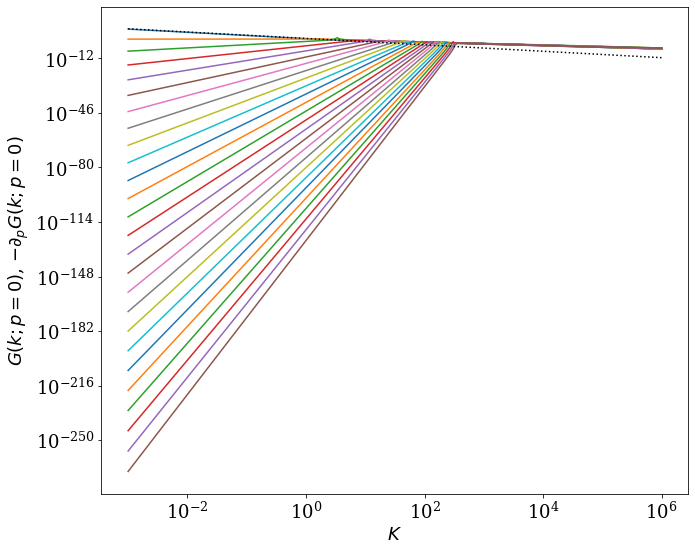

In [9]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(k_val_vec, np.abs(residue_zero)[:,:],'-')
#plt.plot(k_val_vec, np.imag(residue_zero),'-')
#plt.plot(k_val_vec, k_val_vec ** -1,'--')
#a1 = np.sqrt(1 / 3)
plt.plot(k_val_vec, 1 / a1 ** 2 * k_val_vec ** -2,'k:')
#plt.plot(k_val_vec, 4 / a1 ** 4 * k_val_vec ** -4,'k:')

 
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'$G(k;p=0)$, $-\partial_{p} G(k;p=0)$')
#plt.ylim((1e-12, 1e6))
#plt.xlim((2, 20))
plt.tight_layout()
plt.show()

Calculate the 2-point structure factor $S_{2}$

In [22]:
importlib.reload(wlcstruc)

num_k = 100
k_val_0 = 1e-3
k_val_f = 1e4
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

length_kuhn_vec = np.array([0.01, 0.1, 1, 10])
dimensions = 3

s2 = wlcstruc.s2_wlc(k_val, length_kuhn_vec, dimensions, alpha_max = 25)

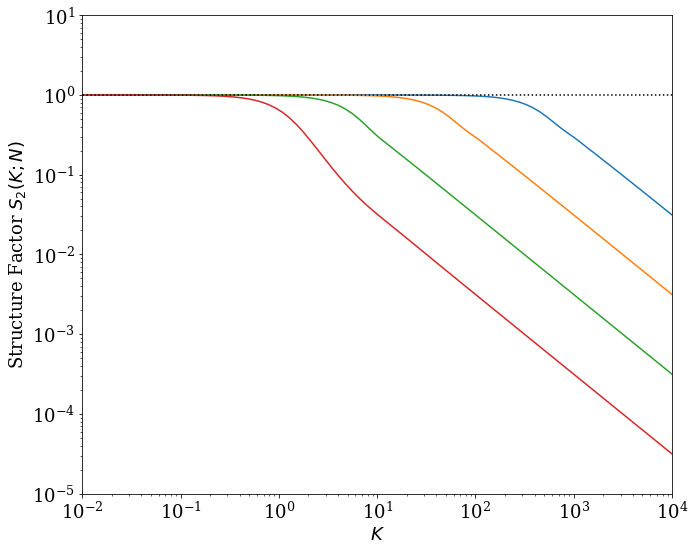

In [23]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for ind_length in range(0, len(length_kuhn_vec)):
    plt.plot(k_val, np.real(s2[:, ind_length]),'-')
    
plt.plot(k_val, 0 * k_val + 1,'k:')    
 
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
plt.ylim((1e-5, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

Calculate the 3-point structure factor $S_{3}$

In [24]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)
importlib.reload(active_brown)
importlib.reload(vertex)

<module 'wlcstat.util.wlc_vertex' from '../wlcstat/wlcstat/util/wlc_vertex.py'>

In [25]:
num_k = 100
k_val_0 = 1e-2
k_val_f = 1e4
length_kuhn_vec = np.array([0.1, 1, 10, 100, 1000, 10000])
dimensions = 3

k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))

k1_vec[:, 0] += np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
theta = np.pi * 2 / 3
frac = 1
k2_vec[:, 0] += frac * np.cos(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
k2_vec[:, 1] += frac * np.sin(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))

s3 = wlcstruc.s3_wlc(k1_vec, k2_vec, length_kuhn_vec, dimensions, alpha_max = 15)
#s3_noswitch = wlcstruc.s3_wlc_new(k1_vec, k2_vec, length_kuhn_vec, dimensions, alpha_max = 15, switch = False)
s2_1 = wlcstruc.s2_wlc(k1_val, length_kuhn_vec, dimensions, alpha_max = 25)
s2_2 = wlcstruc.s2_wlc(k2_val, length_kuhn_vec, dimensions, alpha_max = 25)

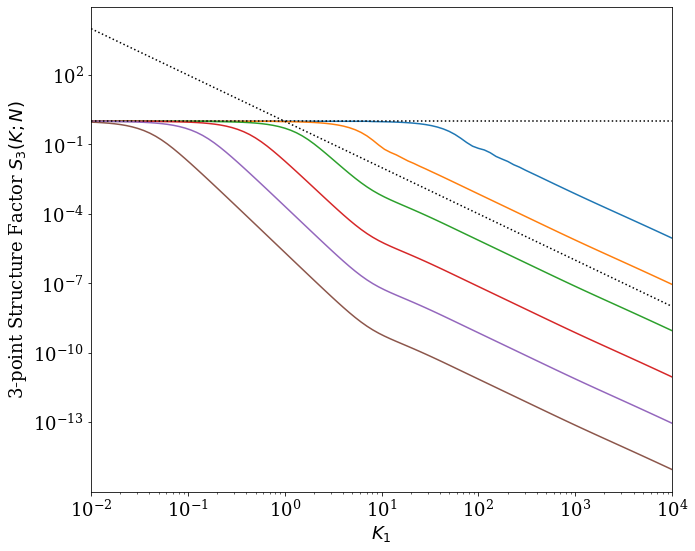

In [26]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}

plt.rc('font', **font)

for i_length in range(len(length_kuhn_vec)):
    plt.plot(k1_vec[:, 0], np.abs(s3[:,i_length]),'-', color = 'C' + str(i_length))
 
plt.plot(k1_vec[:, 0], 0 * k1_vec[:, 0] + 1,'k--')
plt.plot(k1_vec[:, 0], k1_vec[:, 0] ** (-2),'k:')

plt.xscale('log')
plt.yscale('log')
    
plt.xlabel(r'$K_{1}$')
plt.ylabel(r'3-point Structure Factor $S_{3}(K;N)$')
#plt.ylim((1e-11, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

Calculate the 4-point structure factor $S_{4}$

In [53]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_k = 50
k_val_0 = 1e-2
k_val_f = 1e4
length_kuhn_vec = np.array([0.1, 1, 10, 100, 1000, 10000])
dimensions = 3

k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))
k3_vec = np.zeros((num_k, 3))

#th = np.arccos(2 * ((np.random.uniform() - 0.5)))
#phi = 2 * np.pi * (np.random.uniform() - 0.5)
th = 0
phi = 0
k1_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k1_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k1_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

th = np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 2 * np.pi * (np.random.uniform() - 0.5)
#th = np.pi * 109.5 / 180
#phi = 0
k2_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k2_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k2_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

th = np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 2 * np.pi * (np.random.uniform() - 0.5)
#th = np.pi * 109.5 / 180
#phi = np.pi * 2 / 3
k3_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k3_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k3_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

s4 = wlcstruc.s4_wlc(k1_vec, k2_vec, k3_vec, length_kuhn_vec, dimensions, alpha_max = 10)

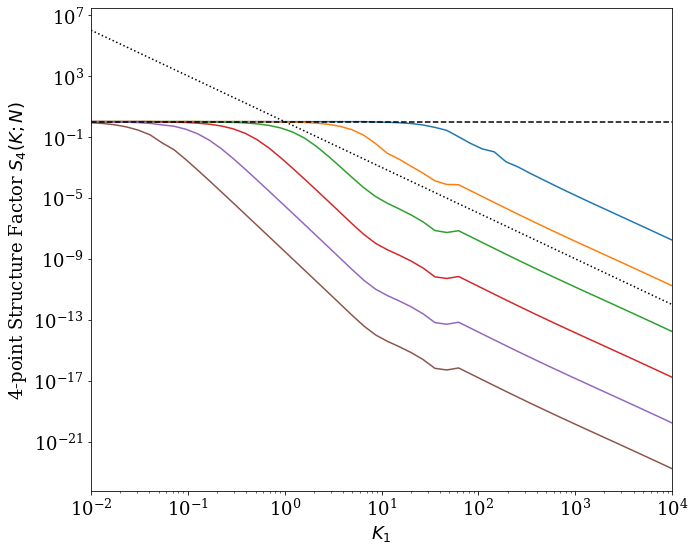

In [54]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}

plt.rc('font', **font)


for i_length in range(len(length_kuhn_vec)):
    plt.plot(np.abs(k1_vec[:, 2]), np.real(s4[:,i_length]),'-', color = 'C' + str(i_length))
#    plt.plot(k1_vec[:, 0], np.abs(s2_1[:,i_length] * s2_2[:,i_length]) * s2_3[:,i_length],
#             '--', color = 'C' + str(i_length))
    
#plt.plot(k1_vec[:, 0], np.real(s3_save),'-')
#plt.plot(k1_vec[:, 0], k1_vec[:, 0] ** -2, '-')
 
plt.plot(k1_vec[:, 2], 0 * k1_vec[:, 2] + 1,'k--')
plt.plot(k1_vec[:, 2], k1_vec[:, 2] ** (-3),'k:')

plt.xscale('log')
plt.yscale('log')
    
plt.xlabel(r'$K_{1}$')
plt.ylabel(r'4-point Structure Factor $S_{4}(K;N)$')
#plt.ylim((1e-11, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

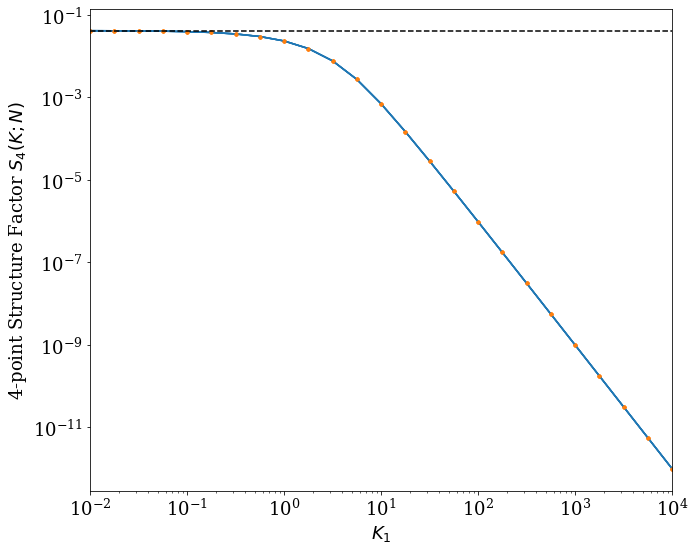

In [69]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_p = 25
p_val_0 = 1e-2
p_val_f = 1e4
dimensions = 3
length = 1.

pole = - np.logspace(np.log10(p_val_0), np.log10(p_val_f), num_p)

pole2 = -1
pole3 = -1.5

integ = np.zeros((num_p))
integ2 = np.zeros((num_p))
for i in range(num_p):
    integ[i] = wlcstruc.calc_s4_int_mag(length, pole[i], pole[i], pole[i], frac_zero=1.0)
    poles_vec = np.array([pole[i], pole[i], pole[i], 0, 0])
    integ2[i] = np.real(wlcstruc.calc_int_mag(length, poles_vec, frac_zero=1.0))


plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}

plt.rc('font', **font)


for i_length in range(len(length_kuhn_vec)):
    plt.plot(k1_vec[:, 0], np.abs(integ),'-', color = 'C0')
    plt.plot(k1_vec[:, 0], np.abs(integ),'.', color = 'C1')
    
 
plt.plot(k1_vec[:, 0], 0 * k1_vec[:, 0] + 1/24,'k--')

plt.xscale('log')
plt.yscale('log')
    
plt.xlabel(r'$K_{1}$')
plt.ylabel(r'4-point Structure Factor $S_{4}(K;N)$')
#plt.ylim((1e-11, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

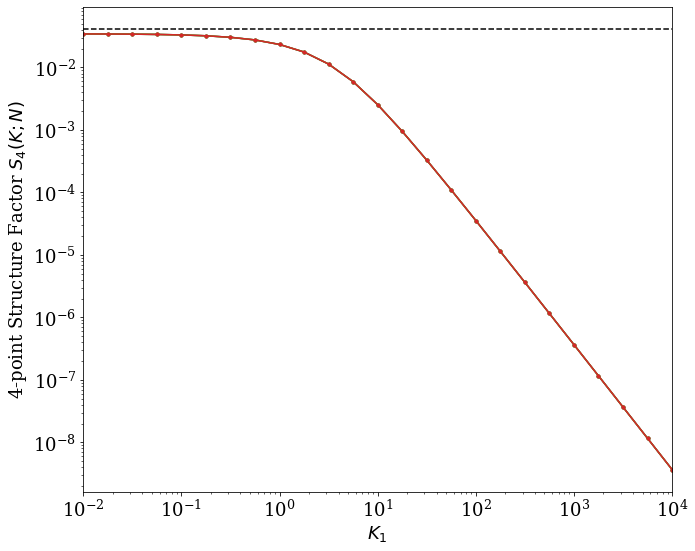

In [50]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_p = 25
p_val_0 = 1e-2
p_val_f = 1e4
dimensions = 3
length = 1.

pole = - np.logspace(np.log10(p_val_0), np.log10(p_val_f), num_p)

pole2 = -1

integ = np.zeros((num_p))
for i in range(num_p):
    integ[i] = wlcstruc.calc_s4_int_mag(length, pole2, pole[i], pole[i], frac_zero=1.0)


plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}

plt.rc('font', **font)


for i_length in range(len(length_kuhn_vec)):
    plt.plot(k1_vec[:, 0], np.abs(integ),'.-', color = 'C' + str(i_length))
    
 
plt.plot(k1_vec[:, 0], 0 * k1_vec[:, 0] + 1/24,'k--')

plt.xscale('log')
plt.yscale('log')
    
plt.xlabel(r'$K_{1}$')
plt.ylabel(r'4-point Structure Factor $S_{4}(K;N)$')
#plt.ylim((1e-11, 1e1))
plt.xlim((1e-2, 1e4))
plt.tight_layout()
plt.show()

In [88]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_k = 25
k_val_0 = 1e-2
k_val_f = 1e4
length_kuhn_vec = np.array([0.1, 1, 10, 100])
dimensions = 3

k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))
k3_vec = np.zeros((num_k, 3))

k1_vec_ik = np.zeros((1, 3))
k2_vec_ik = np.zeros((1, 3))
k3_vec_ik = np.zeros((1, 3))

k1_vec[:, 0] += np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
theta = 2 * np.pi / 4 + 0.01 * (np.random.uniform() - 0.5)
k2_vec[:, 0] += np.cos(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
k2_vec[:, 1] += np.sin(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
theta = 4 * np.pi / 4 + 0.01 * (np.random.uniform() - 0.5)
k3_vec[:, 0] += np.cos(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
k3_vec[:, 1] += np.sin(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

ik = 20
print(k1_val[ik])

k1_vec_ik[0, :] = k1_vec[ik, :]
k2_vec_ik[0, :] = k2_vec[ik, :]
k3_vec_ik[0, :] = k3_vec[ik, :]

s4_ik,resi_ka_ik, resi_kb_ik, resi_kc_ik, ylm_abc_ik, integ_ik = wlcstruc.s4_wlc_new(k1_vec_ik, k2_vec_ik, k3_vec_ik, length_kuhn_vec, dimensions, alpha_max = 10)

1000.0


In [169]:
s4

array([[ 1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j],
       [ 1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j],
       [ 1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j],
       [ 1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j],
       [ 1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j],
       [ 1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j],
       [ 1. +0.j,  1. +0.j,  1. +0.j, nan+nanj],
       [ 1. +0.j,  1. +0.j,  1. +0.j, nan+nanj],
       [ 1. +0.j,  1. +0.j,  1. +0.j, nan+nanj],
       [ 1. +0.j,  1. +0.j,  1. +0.j, nan+nanj],
       [ 1. +0.j,  1. +0.j, nan+nanj, nan+nanj],
       [ 1. +0.j,  1. +0.j, nan+nanj, nan+nanj],
       [ 1. +0.j,  1. +0.j, nan+nanj, nan+nanj],
       [ 1. +0.j,  1. +0.j, nan+nanj, nan+nanj],
       [ 1. +0.j,  1. +0.j, nan+nanj, nan+nanj],
       [ 1. +0.j,  1. +0.j, nan+nanj, nan+nanj],
       [ 1. +0.j, nan+nanj, nan+nanj, nan+nanj],
       [ 1. +0.j, nan+nanj, nan+nanj, nan+nanj],
       [ 1. +0.j, nan+nanj, nan+nanj, nan+nanj],
       [ 1. +0.j, nan+nanj, nan+nanj, nan+nanj],
       [ 1. +0.j, na

In [92]:
np.outer(resi_ka_ik, resi_kc_ik)

array([[ 1.59383624e-05-1.98419067e-03j,  1.33689890e-04-3.32717783e-03j,
         4.20515871e-04-4.01336651e-03j,  8.65726279e-04-4.25511534e-03j,
         1.40186526e-03-4.10524689e-03j,  1.92411789e-03-3.61271105e-03j,
         2.31762831e-03-2.85671051e-03j,  2.48931190e-03-1.95284251e-03j,
         2.39575808e-03-1.03996852e-03j,  2.05759537e-03-2.52971000e-04j,
         1.55385406e-03+3.08952951e-04j],
       [ 1.33689890e-04-3.32717783e-03j,  4.03584873e-04-5.57339170e-03j,
         9.21660107e-04-6.70885883e-03j,  1.68143255e-03-7.09033968e-03j,
         2.57260744e-03-6.81006849e-03j,  3.42201975e-03-5.95579777e-03j,
         4.04129380e-03-4.66656361e-03j,  4.28053214e-03-3.14127227e-03j,
         4.07440845e-03-1.61517288e-03j,  3.46479325e-03-3.13388700e-04j,
         2.58958941e-03+6.01959372e-04j],
       [ 4.20515871e-04-4.01336651e-03j,  9.21660107e-04-6.70885883e-03j,
         1.63653442e-03-8.04174773e-03j,  2.58505247e-03-8.44399055e-03j,
         3.64100313e-03-8.03

In [96]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.outer(a, b)
d = np.outer(a, b) * c

In [101]:
print(c)
print(d)
print(np.sum(d))

[[ 5  6  7  8]
 [10 12 14 16]
 [15 18 21 24]
 [20 24 28 32]]
[[  25   36   49   64]
 [ 100  144  196  256]
 [ 225  324  441  576]
 [ 400  576  784 1024]]
5220


In [103]:
25 + 36+49+64

174

In [104]:
174+174 * 4+174*9+174*16

5220

In [152]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_k = 50
k_val_0 = 1e-2
k_val_f = 1e4
length_kuhn_vec = np.array([0.1, 1, 10, 100])
dimensions = 3

k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))
k3_vec = np.zeros((num_k, 3))

th = 0 * np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 0 * 2 * np.pi * (np.random.uniform() - 0.5)
k1_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k1_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k1_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

th = np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 2 * np.pi * (np.random.uniform() - 0.5)
k2_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k2_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k2_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

th = np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 2 * np.pi * (np.random.uniform() - 0.5)
k3_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k3_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k3_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

#k1_vec[:, 2] += np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
#theta = 2 * np.pi / 4 + 0. * (np.random.uniform() - 0.5)
#k2_vec[:, 0] += np.cos(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
#k2_vec[:, 1] += np.sin(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
#theta = 4 * np.pi / 4 + 0. * (np.random.uniform() - 0.5)
#k3_vec[:, 0] += np.cos(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
#k3_vec[:, 1] += np.sin(theta) * np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

ind_kval = 20
print(k1_vec[ind_kval, :])
s4 = wlcstruc.s4_wlc_case(k1_vec[ind_kval:(ind_kval + 1), :], 
                          k2_vec[ind_kval:(ind_kval + 1), :], 
                          k3_vec[ind_kval:(ind_kval + 1), :], length_kuhn_vec, dimensions, alpha_max = 3)
#s2_1 = wlcstruc.s2_wlc(k1_val, length_kuhn_vec, dimensions, alpha_max = 25)
#s2_2 = wlcstruc.s2_wlc(k2_val, length_kuhn_vec, dimensions, alpha_max = 25)
#s2_3 = wlcstruc.s2_wlc(k3_val, length_kuhn_vec, dimensions, alpha_max = 25)

[0.        0.        2.8117687]
[3.48108935e-06+1.59882546e-07j 8.53710794e-03+4.15806197e-03j
 8.68606496e-02+4.63490717e-01j 5.43310130e-01+5.15151927e+00j]
[4.05945840e-12-4.60392764e-18j 5.47675999e-05-1.01686305e-17j
 1.02038322e-01-5.88938620e-16j 1.28973920e+00-6.21724894e-15j]
2
[3.66989193e-06+1.67135294e-07j 1.19138751e-02+5.58211609e-03j
 1.49118519e-01+7.90973668e-01j 9.37757318e-01+8.89080545e+00j]
[4.05821575e-12-5.03553375e-15j 5.47675999e-05+3.74862901e-17j
 1.02038322e-01-5.26662047e-15j 1.28973920e+00-8.65973959e-15j]
1
[ 3.80544978e-06+3.88329425e-07j  1.05296726e-02+1.34516431e-02j
 -6.80688607e-01+6.46353990e-01j -8.16549834e+00+6.25633990e+00j]
[1.51061255e-04-1.00384937e-05j 1.02098218e+00+3.08343287e-02j
 2.36243789e+02+1.60634587e+01j 3.39608667e+03+1.88980660e+02j]
0


In [147]:
mu = 1
rho_ab = 0.3
alpha_max = 20
print(wlcstruc.eval_legendre(rho_ab, mu, alpha_max))
print(sp.lpmn(0, alpha_max, rho_ab))
#print(np.arange(alpha_max + 1))

[-6.74536878e-01 -3.50499643e-01  2.27187285e-01  3.79153708e-01
  2.93576327e-02 -2.97593358e-01 -1.92589067e-01  1.50573041e-01
  2.56762189e-01  1.17366562e-02 -2.26465987e-01 -1.41423906e-01
  1.27104301e-01  2.04995628e-01  5.71070209e-04 -1.91798891e-01
 -1.12425752e-01  1.15426304e-01  1.74018567e-01 -7.71179114e-03]
(array([[ 1.        ,  0.3       , -0.365     , -0.3825    ,  0.0729375 ,
         0.34538625,  0.12918119, -0.22407298, -0.23907459,  0.06370038,
         0.25147635,  0.08611793, -0.18100218, -0.1839178 ,  0.06166387,
         0.20742166,  0.06275397, -0.15867543, -0.1518283 ,  0.0616244 ,
         0.18028716]]), array([[ 0.        ,  1.        ,  0.9       , -0.825     , -1.7775    ,
        -0.1685625 ,  2.02174875,  1.51079294, -1.33934597, -2.55347511,
        -0.12903872,  2.72752823,  1.85167358, -1.79752626, -3.11410714,
        -0.00927416,  3.31596431,  2.06160671, -2.23767571, -3.55604043,
         0.16567585]]))


In [78]:
for i in reversed(range(0, 10)):
    print(i)

9
8
7
6
5
4
3
2
1
0


In [120]:
s4

array([[ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.000000